In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
# from keras.utils import np_utils
import cv2

import gc
from keras import backend as bek

In [12]:
# 참고 : https://dacon.io/codeshare/1679

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [14]:
# train data 2000개만 사용해서 학습

x_train = x_train[0:10000]
y_train = y_train[0:10000]

print(x_train.shape)
print(y_train.shape)

(10000, 28, 28)
(10000,)


In [15]:
# 데이터 정규화 ( 0~1 값 갖도록 )

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [16]:
#x_train resize

x_train_224=np.zeros([10000,32,32,3],dtype=np.float32)

for i, s in enumerate(x_train):
    converted = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB)
    resized = cv2.resize(converted,(32,32),interpolation = cv2.INTER_CUBIC)
    del converted
    x_train_224[i] = resized
    del resized
    bek.clear_session()
    gc.collect()

In [17]:
#x_test resize

x_test_224=np.zeros([10000,32,32,3],dtype=np.float32)

for i, s in enumerate(x_test):
    converted = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB)
    resized = cv2.resize(converted,(32,32),interpolation = cv2.INTER_CUBIC)
    del converted
    x_test_224[i] = resized
    del resized

bek.clear_session()
gc.collect()

116

In [18]:
print("끝남")

끝남


In [19]:
effnet = tf.keras.applications.EfficientNetB3(
      include_top=True,
      weights=None,
      input_shape=(32,32,3),
      classes=10,
      classifier_activation="softmax",
  )
model = Sequential()
model.add(effnet)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 10)               10798905  
                                                                 
Total params: 10,798,905
Trainable params: 10,711,602
Non-trainable params: 87,303
_________________________________________________________________


In [21]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam', 
              metrics=['accuracy'])

In [22]:
print(y_train.shape)
print(y_test.shape)

from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(y_test.shape)

(10000,)
(10000,)
(10000, 10)
(10000, 10)


In [23]:
hist = model.fit(
                x = x_train_224,
                y = y_train,
                epochs=10,
                batch_size=64
                )

Epoch 1/10
157/157 [==============================] - 127s 719ms/step - loss: 3.4547 - accuracy: 0.2629
Epoch 2/10
157/157 [==============================] - 114s 728ms/step - loss: 1.5648 - accuracy: 0.4609
Epoch 3/10
157/157 [==============================] - 115s 733ms/step - loss: 1.2175 - accuracy: 0.5630
Epoch 4/10
157/157 [==============================] - 116s 738ms/step - loss: 1.0296 - accuracy: 0.6254
Epoch 5/10
157/157 [==============================] - 115s 736ms/step - loss: 0.9120 - accuracy: 0.6769
Epoch 6/10
157/157 [==============================] - 116s 739ms/step - loss: 0.7877 - accuracy: 0.7105
Epoch 7/10
157/157 [==============================] - 115s 734ms/step - loss: 0.7339 - accuracy: 0.7289
Epoch 8/10
157/157 [==============================] - 115s 735ms/step - loss: 0.7108 - accuracy: 0.7559
Epoch 9/10
157/157 [==============================] - 116s 738ms/step - loss: 0.6617 - accuracy: 0.7708
Epoch 10/10
157/157 [==============================] - 115s 735m

In [24]:
############# 모델 저장 ##################

model.save("EfficientNet_28")

INFO:tensorflow:Assets written to: EfficientNet_28\assets


INFO:tensorflow:Assets written to: EfficientNet_28\assets


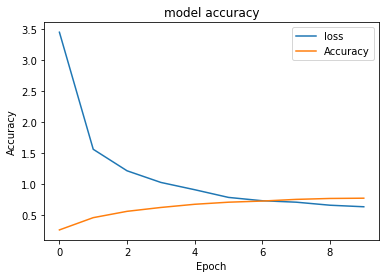

In [25]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss", "Accuracy"])
plt.show()

In [26]:
# 테스트 셋으로 모델 평가
score = model.evaluate(x_test_224, y_test, verbose=0)

# 테스트 정확도
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7795000076293945
